In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install phik -q
import phik
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
!pip install catboost -q
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

RANDOM_STATE = 42
TEST_SIZE = 0.25

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.2 MB/s eta 0:00:00


## Loading Data

In [39]:
df = pd.read_excel('/content/data_CW.xlsx', sheet_name='Values')
df


,ID,REGION,FO,Q1010,S1,S2,S3,S3_AGE,S4,Q1,...,D6,D6_DR,D7,D7_DR,D8,D8_DR,D9,D10,D10_DR,D11
0,Идентификатор респондента,Region. Отметьте Ваш регион,FO. Федеральный округ,Место опроса,"S1. Тип населённого пункта, где живёт респондент",S2. Пол респондента,"S3. Скажите, пожалуйста, сколько лет Вам испол...",(Запишите) (лет),S4. Какое у Вас образование?,"Q1. Как Вы считаете, большинству людей можно д...",...,"D6. В какой отрасли Вы работаете, какова сфера...",Другое (уточните),D7. Членом или сторонником какой политической ...,Другое (уточнить),D8. Считаете ли Вы себя верующим человеком? И ...,Другое (уточнить ),D9. Какое место занимает религия в Вашей жизни?,D10. В чём выражается Ваша принадлежность к ве...,Другое (уточнить ),D11. Как Вы оцениваете состояние своего здоровья?
1,063a20a33e679b4,25,8,130,8,1,5,70,4,1,...,NaN,NaN,97,NaN,97,NaN,NaN,NaN,NaN,3
2,06539b004760a54,64,5,82,8,1,5,71,2,1,...,NaN,NaN,97,NaN,97,NaN,NaN,NaN,NaN,4
3,06e85272a3a11d4,5,4,62,5,2,3,44,6,2,...,4,NaN,97,NaN,3,NaN,1,5,NaN,3
4,06470c0967c0d24,59,5,72,3,1,3,43,4,2,...,1,NaN,97,NaN,1,NaN,99,99,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,061ac1e15119c64,68,1,26,3,1,4,47,4,2,...,3,NaN,1,NaN,1,NaN,2,1,NaN,3
1999,0623507c3cf5234,24,7,120,3,1,5,66,2,2,...,NaN,NaN,97,NaN,97,NaN,NaN,NaN,NaN,4
2000,062f1d657921fa4,43,5,74,2,2,4,50,4,2,...,5,NaN,97,NaN,97,NaN,NaN,NaN,NaN,3
2001,069638fd3a96784d,26,4,59,8,1,4,54,4,2,...,98,охрана,97,NaN,97,NaN,NaN,NaN,NaN,2


In [52]:
ex_data = pd.read_excel('/content/data_CW.xlsx', sheet_name='Labels')
ex_data.head()

,ID,REGION,FO,Q1010,S1,S2,S3,S3_AGE,S4,Q1,...,D6,D6_DR,D7,D7_DR,D8,D8_DR,D9,D10,D10_DR,D11
0,Идентификатор респондента,Region. Отметьте Ваш регион,FO. Федеральный округ,Место опроса,"S1. Тип населённого пункта, где живёт респондент",S2. Пол респондента,"S3. Скажите, пожалуйста, сколько лет Вам испол...",(Запишите) (лет),S4. Какое у Вас образование?,"Q1. Как Вы считаете, большинству людей можно д...",...,"D6. В какой отрасли Вы работаете, какова сфера...",Другое (уточните),D7. Членом или сторонником какой политической ...,Другое (уточнить),D8. Считаете ли Вы себя верующим человеком? И ...,Другое (уточнить ),D9. Какое место занимает религия в Вашей жизни?,D10. В чём выражается Ваша принадлежность к ве...,Другое (уточнить ),D11. Как Вы оцениваете состояние своего здоровья?
1,063a20a33e679b4,Приморский край,Дальневосточный федеральный округ,Надеждинский муниципальный район,Село,Мужчина,60+ лет,70,"Среднее специальное (колледж, техникум, медици...",Большинству людей можно доверять,...,NaN,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Верующим человеком себя не считаю,NaN,NaN,NaN,NaN,Среднее
2,06539b004760a54,Саратовская область,Приволжский федеральный округ,Энгельсский муниципальный район,Село,Мужчина,60+ лет,71,Среднее общее (школа),Большинству людей можно доверять,...,NaN,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Верующим человеком себя не считаю,NaN,NaN,NaN,NaN,Плохое
3,06e85272a3a11d4,Республика Дагестан,Северо-Кавказский федеральный округ,г. Буйнакск,Город с населением от 50 до 100 тыс.,Женщина,35-44 года,44,"Высшее (диплом специалиста, бакалавра, магистра)",В отношениях с людьми следует быть осторожными,...,"Сфера услуг, сервиса, бытового обслуживания",NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Мусульманин,NaN,Очень важное,"Стараюсь выполнять религиозные предписания, ре...",NaN,Среднее
4,06470c0967c0d24,Пермский край,Приволжский федеральный округ,г. Березники,Город с населением от 100 до 500 тыс.,Мужчина,35-44 года,43,"Среднее специальное (колледж, техникум, медици...",В отношениях с людьми следует быть осторожными,...,Промышленное производство (в т.ч. добывающие о...,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Православный,NaN,Затрудняюсь ответить,/НЕ НА КАРТОЧКЕ / Затрудняюсь ответить,NaN,Хорошее


## Preprocessing

In [40]:
df.drop('ID', axis= 1 , inplace= True )

In [53]:
ex_data.drop('ID', axis= 1 , inplace= True )

In [54]:
ex_data = ex_data.drop(ex_data.index[0], inplace=False)
ex_data.reset_index(drop=True, inplace=True)
ex_data.head()

,REGION,FO,Q1010,S1,S2,S3,S3_AGE,S4,Q1,Q2,...,D6,D6_DR,D7,D7_DR,D8,D8_DR,D9,D10,D10_DR,D11
0,Приморский край,Дальневосточный федеральный округ,Надеждинский муниципальный район,Село,Мужчина,60+ лет,70,"Среднее специальное (колледж, техникум, медици...",Большинству людей можно доверять,Большинству можно доверять,...,NaN,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Верующим человеком себя не считаю,NaN,NaN,NaN,NaN,Среднее
1,Саратовская область,Приволжский федеральный округ,Энгельсский муниципальный район,Село,Мужчина,60+ лет,71,Среднее общее (школа),Большинству людей можно доверять,Большинству можно доверять,...,NaN,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Верующим человеком себя не считаю,NaN,NaN,NaN,NaN,Плохое
2,Республика Дагестан,Северо-Кавказский федеральный округ,г. Буйнакск,Город с населением от 50 до 100 тыс.,Женщина,35-44 года,44,"Высшее (диплом специалиста, бакалавра, магистра)",В отношениях с людьми следует быть осторожными,В отношениях с людьми моего окружения следует ...,...,"Сфера услуг, сервиса, бытового обслуживания",NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Мусульманин,NaN,Очень важное,"Стараюсь выполнять религиозные предписания, ре...",NaN,Среднее
3,Пермский край,Приволжский федеральный округ,г. Березники,Город с населением от 100 до 500 тыс.,Мужчина,35-44 года,43,"Среднее специальное (колледж, техникум, медици...",В отношениях с людьми следует быть осторожными,В отношениях с людьми моего окружения следует ...,...,Промышленное производство (в т.ч. добывающие о...,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Православный,NaN,Затрудняюсь ответить,/НЕ НА КАРТОЧКЕ / Затрудняюсь ответить,NaN,Хорошее
4,Омская область,Сибирский федеральный округ,г. Омск,Город с населением 1 млн и более,Мужчина,18-24 года,23,Среднее общее (школа),Большинству людей можно доверять,Большинству можно доверять,...,NaN,NaN,Не являюсь членом или сторонником какой-либо п...,NaN,Затрудняюсь ответить/отказ от ответа,NaN,Совершенно не важное,/НЕ НА КАРТОЧКЕ / Затрудняюсь ответить,NaN,Хорошее


In [4]:
df = df.drop(df.index[0], inplace=False)
df.reset_index(drop=True, inplace=True)
df

,REGION,FO,Q1010,S1,S2,S3,S3_AGE,S4,Q1,Q2,...,D6,D6_DR,D7,D7_DR,D8,D8_DR,D9,D10,D10_DR,D11
0,25,8,130,8,1,5,70,4,1,1,...,NaN,NaN,97,NaN,97,NaN,NaN,NaN,NaN,3
1,64,5,82,8,1,5,71,2,1,1,...,NaN,NaN,97,NaN,97,NaN,NaN,NaN,NaN,4
2,5,4,62,5,2,3,44,6,2,2,...,4,NaN,97,NaN,3,NaN,1,5,NaN,3
3,59,5,72,3,1,3,43,4,2,2,...,1,NaN,97,NaN,1,NaN,99,99,NaN,2
4,55,7,110,1,1,1,23,2,1,1,...,NaN,NaN,97,NaN,99,NaN,4,99,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,68,1,26,3,1,4,47,4,2,2,...,3,NaN,1,NaN,1,NaN,2,1,NaN,3
1998,24,7,120,3,1,5,66,2,2,99,...,NaN,NaN,97,NaN,97,NaN,NaN,NaN,NaN,4
1999,43,5,74,2,2,4,50,4,2,2,...,5,NaN,97,NaN,97,NaN,NaN,NaN,NaN,3
2000,26,4,59,8,1,4,54,4,2,2,...,98,охрана,97,NaN,97,NaN,NaN,NaN,NaN,2


## EDA

<Axes: ylabel='REGION'>

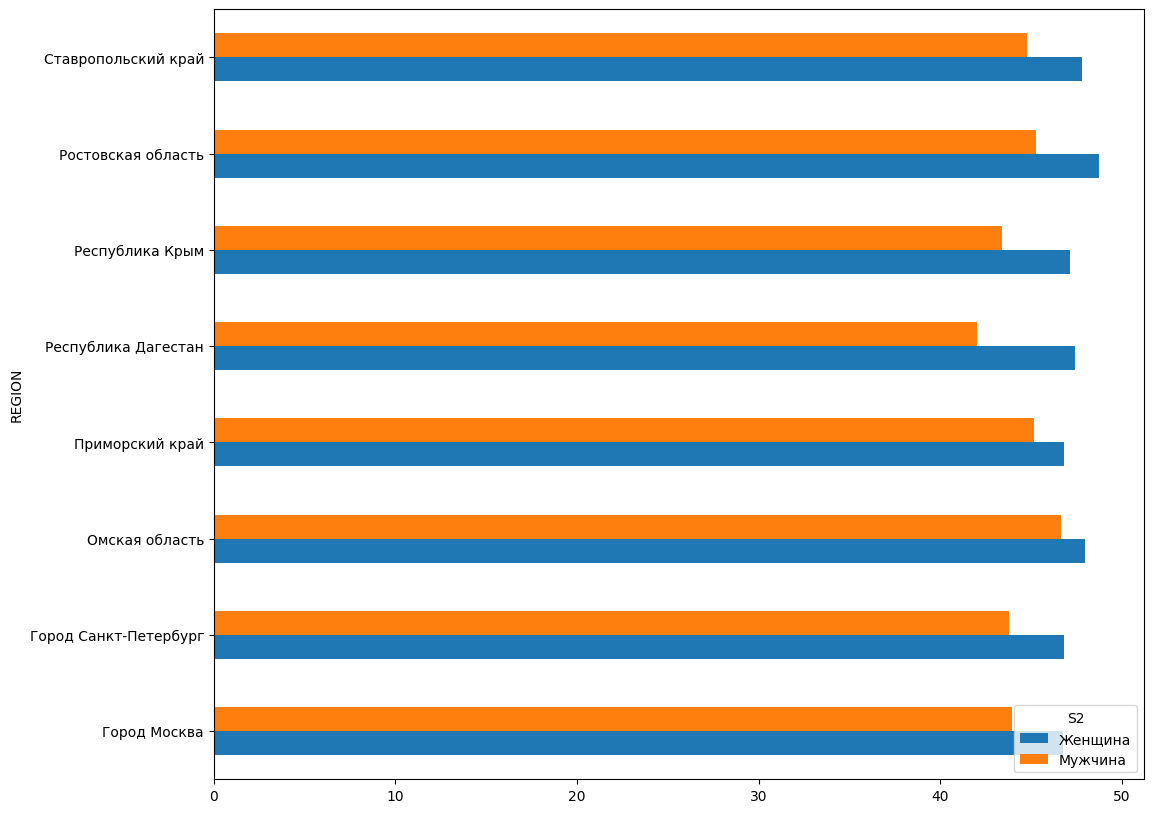

In [64]:
regs = ['Город Москва', 'Город Санкт-Петербург', 'Республика Дагестан', 'Ставропольский край', 'Ростовская область', 'Приморский край', 'Омская область', 'Республика Крым']
pivot_age = ex_data.query('REGION in @regs').pivot_table(index="REGION", values="S3_AGE", columns=['S2'], aggfunc = 'mean')
pivot_age.plot(kind='barh', figsize=(12, 10))

In [66]:
ex_data['S4'] = ex_data['S4'].replace('Среднее специальное (колледж, техникум, медицинское училище и т.п.)')

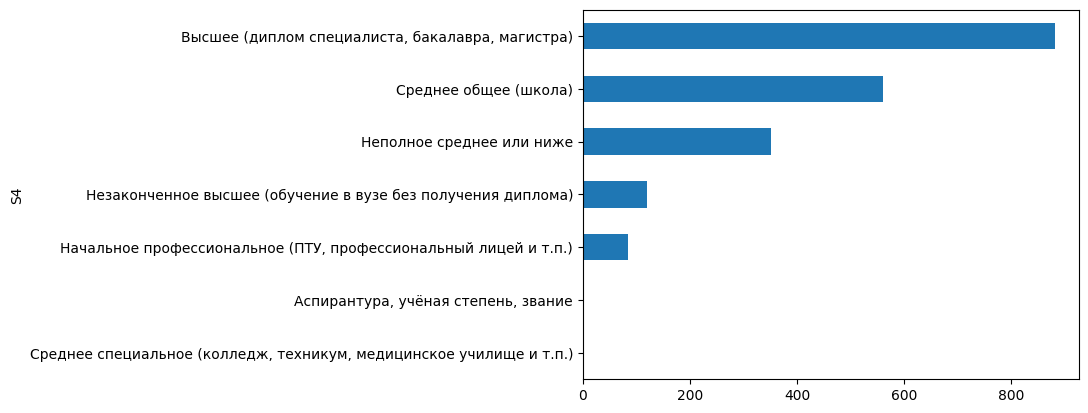

In [69]:
ax = ex_data['S4'].value_counts().sort_values().plot(kind='barh')

## Modeling. Q3

In [6]:
df_q3 = df[['S1', 'S2', 'S3_AGE', 'S4', 'Q1', 'Q2', 'Q4', 'Q5', 'Q6', 'Q41', 'Q33', 'Q26', 'Q3', 'D1', 'D2', 'D3', 'D11']]
df_q3['S3_AGE'] = df_q3['S3_AGE'].astype('int')
df_q3['Q3'] = df_q3['Q3'].astype('category')
df_q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   S1      2002 non-null   object  
 1   S2      2002 non-null   object  
 2   S3_AGE  2002 non-null   int64   
 3   S4      2002 non-null   object  
 4   Q1      2002 non-null   object  
 5   Q2      2002 non-null   object  
 6   Q4      2002 non-null   object  
 7   Q5      2002 non-null   object  
 8   Q6      2002 non-null   object  
 9   Q41     2002 non-null   object  
 10  Q33     2002 non-null   object  
 11  Q26     2002 non-null   object  
 12  Q3      2002 non-null   category
 13  D1      2002 non-null   object  
 14  D2      2002 non-null   object  
 15  D3      2002 non-null   object  
 16  D11     2002 non-null   object  
dtypes: category(1), int64(1), object(15)
memory usage: 252.5+ KB


<ipython-input-6-6b1dac05b86b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['S3_AGE'] = df_q3['S3_AGE'].astype('int')
<ipython-input-6-6b1dac05b86b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q3['Q3'] = df_q3['Q3'].astype('category')


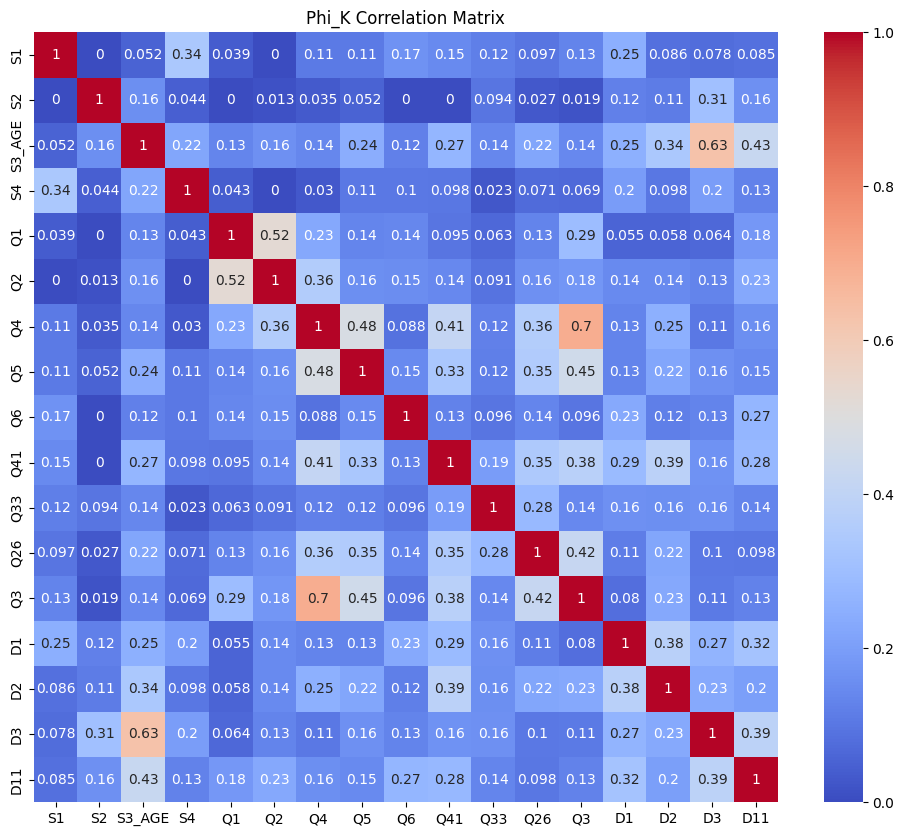

In [7]:
corr_matrix = df_q3.phik_matrix(interval_cols=['S3_AGE'])
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Phi_K Correlation Matrix')
plt.show()

In [8]:
y_missed = df_q3[(df_q3['Q3'] == 99) & ((df_q3['Q1'] != 99) & (df_q3['Q2'] != 99) & (df_q3['Q4'] != 99) & (df_q3['Q5'] != 99) & (df_q3['Q6'] != 99))]['Q3']
X_missed = df_q3[(df_q3['Q3'] == 99) & ((df_q3['Q1'] != 99) & (df_q3['Q2'] != 99) & (df_q3['Q4'] != 99) & (df_q3['Q5'] != 99) & (df_q3['Q6'] != 99))].drop(['Q3'], axis=1)

y = df_q3[(df_q3['Q3'] != 99) & ((df_q3['Q1'] != 99) & (df_q3['Q2'] != 99) & (df_q3['Q4'] != 99) & (df_q3['Q5'] != 99) & (df_q3['Q6'] != 99))]['Q3']
X = df_q3[(df_q3['Q3'] != 99) & ((df_q3['Q1'] != 99) & (df_q3['Q2'] != 99) & (df_q3['Q4'] != 99) & (df_q3['Q5'] != 99) & (df_q3['Q6'] != 99))].drop(['Q3'], axis=1)

y.shape, X.shape

((1691,), (1691, 16))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RANDOM_STATE)
X_train.shape, y_train.shape

((1268, 16), (1268,))

In [10]:
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [2, 5, 15],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

rfc = RandomForestClassifier()
grid_search = GridSearchCV(
    rfc,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [11]:
rfc = RandomForestClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=3, n_estimators=300, random_state=RANDOM_STATE)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7021276595744681


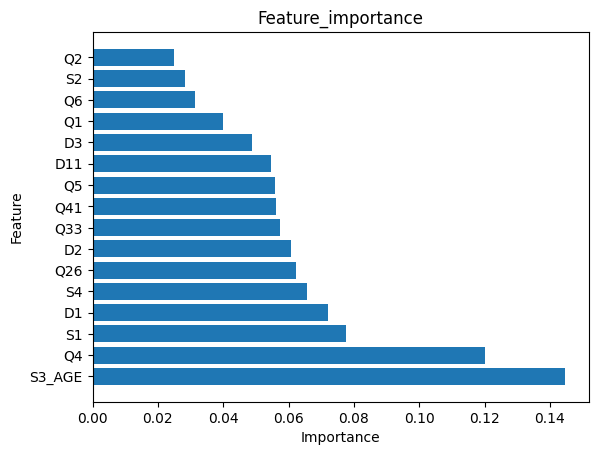

In [12]:
feature_importances = rfc.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature_importance")
plt.show()

In [13]:
param_grid = {
    'n_neighbors': range(1, 11),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 50, 70]
}

knn = KNeighborsClassifier()

cv = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(knn, param_grid, cv=cv)

grid_search.fit(X, y)

best_params = grid_search.best_params_

best_params

{'algorithm': 'ball_tree',
 'leaf_size': 50,
 'n_neighbors': 1,
 'weights': 'uniform'}

In [14]:
knn = KNeighborsClassifier(n_neighbors=3, algorithm='ball_tree', leaf_size=30, weights='distance')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5673758865248227


In [15]:
catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=100
)

score = cross_val_score(catboost_model, X_train, y_train, cv=3, scoring='accuracy')

catboost_model.fit(X_train, y_train)
predictions = catboost_model.predict(X_test)

score = max(score)
print(score)

0:	learn: 1.3388231	total: 48.6ms	remaining: 24.2s
100:	learn: 0.5953069	total: 205ms	remaining: 810ms
200:	learn: 0.3780452	total: 341ms	remaining: 508ms
300:	learn: 0.2653394	total: 482ms	remaining: 319ms
400:	learn: 0.1960745	total: 622ms	remaining: 154ms
499:	learn: 0.1514871	total: 764ms	remaining: 0us
0:	learn: 1.3277120	total: 1.43ms	remaining: 716ms
100:	learn: 0.5824278	total: 140ms	remaining: 553ms
200:	learn: 0.3816148	total: 295ms	remaining: 438ms
300:	learn: 0.2694083	total: 435ms	remaining: 287ms
400:	learn: 0.1965805	total: 574ms	remaining: 142ms
499:	learn: 0.1530022	total: 713ms	remaining: 0us
0:	learn: 1.3406336	total: 1.51ms	remaining: 755ms
100:	learn: 0.6047822	total: 139ms	remaining: 548ms
200:	learn: 0.3955061	total: 274ms	remaining: 408ms
300:	learn: 0.2813546	total: 475ms	remaining: 314ms
400:	learn: 0.2125073	total: 782ms	remaining: 193ms
499:	learn: 0.1658950	total: 1.03s	remaining: 0us
0:	learn: 1.3249960	total: 2.19ms	remaining: 1.09s
100:	learn: 0.6521754	

## Modeling. Q4

In [16]:
df_q4 = df[['S1', 'S2', 'S3_AGE', 'S4', 'Q1', 'Q2', 'Q4', 'Q5', 'Q6', 'Q41', 'Q33', 'Q26', 'Q3', 'D1', 'D2', 'D3', 'D11']]
df_q4['S3_AGE'] = df_q3['S3_AGE'].astype('int')
df_q4['Q4'] = df_q3['Q4'].astype('category')
df_q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   S1      2002 non-null   object  
 1   S2      2002 non-null   object  
 2   S3_AGE  2002 non-null   int64   
 3   S4      2002 non-null   object  
 4   Q1      2002 non-null   object  
 5   Q2      2002 non-null   object  
 6   Q4      2002 non-null   category
 7   Q5      2002 non-null   object  
 8   Q6      2002 non-null   object  
 9   Q41     2002 non-null   object  
 10  Q33     2002 non-null   object  
 11  Q26     2002 non-null   object  
 12  Q3      2002 non-null   object  
 13  D1      2002 non-null   object  
 14  D2      2002 non-null   object  
 15  D3      2002 non-null   object  
 16  D11     2002 non-null   object  
dtypes: category(1), int64(1), object(15)
memory usage: 252.5+ KB


<ipython-input-16-dda2d6607784>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q4['S3_AGE'] = df_q3['S3_AGE'].astype('int')
<ipython-input-16-dda2d6607784>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q4['Q4'] = df_q3['Q4'].astype('category')


In [17]:
y_missed = df_q4[(df_q4['Q4'] == 99) & ((df_q4['Q1'] != 99) & (df_q4['Q2'] != 99) & (df_q4['Q3'] != 99) & (df_q4['Q5'] != 99) & (df_q4['Q6'] != 99))]['Q4']
X_missed = df_q4[(df_q4['Q4'] == 99) & ((df_q4['Q1'] != 99) & (df_q4['Q2'] != 99) & (df_q4['Q3'] != 99) & (df_q4['Q5'] != 99) & (df_q4['Q6'] != 99))].drop(['Q4'], axis=1)

y = df_q4[(df_q4['Q4'] != 99) & ((df_q4['Q1'] != 99) & (df_q4['Q2'] != 99) & (df_q4['Q3'] != 99) & (df_q4['Q5'] != 99) & (df_q4['Q6'] != 99))]['Q4']
X = df_q4[(df_q4['Q4'] != 99) & ((df_q4['Q1'] != 99) & (df_q4['Q2'] != 99) & (df_q4['Q3'] != 99) & (df_q4['Q5'] != 99) & (df_q4['Q6'] != 99))].drop(['Q4'], axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RANDOM_STATE)
X_train.shape, y_train.shape

((1268, 16), (1268,))

In [19]:
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [2, 5, 15],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

rfc = RandomForestClassifier()
grid_search = GridSearchCV(
    rfc,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [20]:
rfc = RandomForestClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=300, random_state=RANDOM_STATE)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7375886524822695


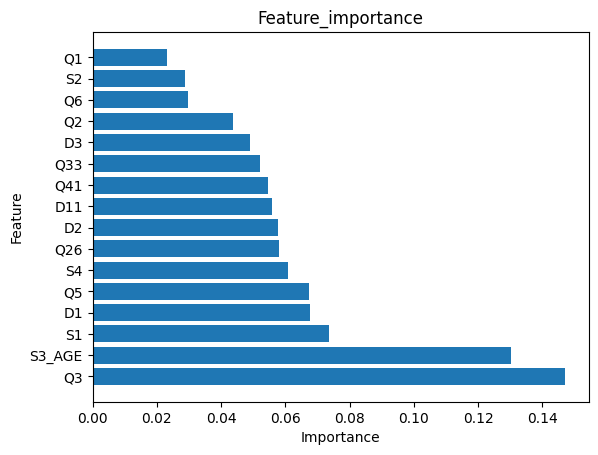

In [21]:
feature_importances = rfc.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature_importance")
plt.show()

In [22]:
param_grid = {
    'n_neighbors': range(1, 11),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 50, 70]
}

knn = KNeighborsClassifier()

cv = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(knn, param_grid, cv=cv)

grid_search.fit(X, y)

best_params = grid_search.best_params_

best_params

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 6, 'weights': 'distance'}

In [23]:
knn = KNeighborsClassifier(n_neighbors=6, algorithm='auto', leaf_size=30, weights='distance')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6028368794326241


In [24]:
catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    random_seed=RANDOM_STATE,
    verbose=100
)

score = cross_val_score(catboost_model, X_train, y_train, cv=3, scoring='accuracy')

catboost_model.fit(X_train, y_train)
predictions = catboost_model.predict(X_test)

score = max(score)
print(score)

0:	learn: 1.3074203	total: 1.55ms	remaining: 776ms
100:	learn: 0.5169828	total: 137ms	remaining: 539ms
200:	learn: 0.3309871	total: 273ms	remaining: 406ms
300:	learn: 0.2299303	total: 407ms	remaining: 269ms
400:	learn: 0.1681959	total: 551ms	remaining: 136ms
499:	learn: 0.1291055	total: 693ms	remaining: 0us
0:	learn: 1.3131431	total: 1.44ms	remaining: 719ms
100:	learn: 0.4873357	total: 145ms	remaining: 574ms
200:	learn: 0.3150178	total: 297ms	remaining: 442ms
300:	learn: 0.2213057	total: 435ms	remaining: 288ms
400:	learn: 0.1612195	total: 569ms	remaining: 141ms
499:	learn: 0.1243017	total: 707ms	remaining: 0us
0:	learn: 1.3145304	total: 1.63ms	remaining: 813ms
100:	learn: 0.5386482	total: 137ms	remaining: 542ms
200:	learn: 0.3423067	total: 277ms	remaining: 412ms
300:	learn: 0.2413973	total: 425ms	remaining: 281ms
400:	learn: 0.1785758	total: 560ms	remaining: 138ms
499:	learn: 0.1383279	total: 689ms	remaining: 0us
0:	learn: 1.3095631	total: 1.71ms	remaining: 853ms
100:	learn: 0.5538119	

## Modeling. Q5

In [25]:
df_q5 = df[['S1', 'S2', 'S3_AGE', 'S4', 'Q1', 'Q2', 'Q4', 'Q5', 'Q6', 'Q41', 'Q33', 'Q26', 'Q3', 'D1', 'D2', 'D3', 'D11']]
df_q5['S3_AGE'] = df_q5['S3_AGE'].astype('int')
df_q5['Q5'] = df_q5['Q5'].astype('category')
df_q5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   S1      2002 non-null   object  
 1   S2      2002 non-null   object  
 2   S3_AGE  2002 non-null   int64   
 3   S4      2002 non-null   object  
 4   Q1      2002 non-null   object  
 5   Q2      2002 non-null   object  
 6   Q4      2002 non-null   object  
 7   Q5      2002 non-null   category
 8   Q6      2002 non-null   object  
 9   Q41     2002 non-null   object  
 10  Q33     2002 non-null   object  
 11  Q26     2002 non-null   object  
 12  Q3      2002 non-null   object  
 13  D1      2002 non-null   object  
 14  D2      2002 non-null   object  
 15  D3      2002 non-null   object  
 16  D11     2002 non-null   object  
dtypes: category(1), int64(1), object(15)
memory usage: 252.5+ KB


<ipython-input-25-0084e16acb6f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q5['S3_AGE'] = df_q5['S3_AGE'].astype('int')
<ipython-input-25-0084e16acb6f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q5['Q5'] = df_q5['Q5'].astype('category')


In [26]:
y_missed = df_q5[(df_q4['Q5'] == 99) & ((df_q5['Q1'] != 99) & (df_q5['Q2'] != 99) & (df_q5['Q3'] != 99) & (df_q5['Q4'] != 99) & (df_q5['Q6'] != 99))]['Q5']
X_missed = df_q5[(df_q4['Q5'] == 99) & ((df_q5['Q1'] != 99) & (df_q5['Q2'] != 99) & (df_q5['Q3'] != 99) & (df_q5['Q4'] != 99) & (df_q5['Q6'] != 99))].drop(['Q5'], axis=1)

y = df_q5[(df_q4['Q5'] != 99) & ((df_q5['Q1'] != 99) & (df_q5['Q2'] != 99) & (df_q5['Q3'] != 99) & (df_q5['Q4'] != 99) & (df_q5['Q6'] != 99))]['Q5']
X = df_q5[(df_q4['Q5'] != 99) & ((df_q5['Q1'] != 99) & (df_q5['Q2'] != 99) & (df_q5['Q3'] != 99) & (df_q5['Q4'] != 99) & (df_q5['Q6'] != 99))].drop(['Q5'], axis=1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, random_state=RANDOM_STATE)
X_train.shape, y_train.shape

((1268, 16), (1268,))

In [28]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 5, 7, 15],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

rfc = RandomForestClassifier()
grid_search = GridSearchCV(
    rfc,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_params

{'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [29]:
rfc = RandomForestClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=RANDOM_STATE)

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6335697399527187


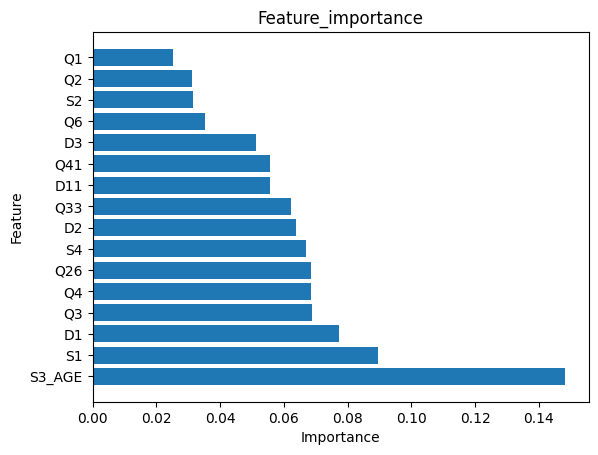

In [30]:
feature_importances = rfc.feature_importances_

feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature_importance")
plt.show()

In [31]:
param_grid = {
    'n_neighbors': range(1, 11),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 50, 70]
}

knn = KNeighborsClassifier()

cv = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(knn, param_grid, cv=cv)

grid_search.fit(X, y)

best_params = grid_search.best_params_

best_params

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 2, 'weights': 'distance'}

In [32]:
knn = KNeighborsClassifier(n_neighbors=2, algorithm='auto', leaf_size=30, weights='distance')

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5650118203309693


In [33]:
catboost_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    random_seed=RANDOM_STATE,
    verbose=100
)

score = cross_val_score(catboost_model, X_train, y_train, cv=3, scoring='accuracy')

catboost_model.fit(X_train, y_train)
predictions = catboost_model.predict(X_test)

score = max(score)
print(score)

0:	learn: 1.3495423	total: 1.59ms	remaining: 795ms
100:	learn: 0.6726940	total: 152ms	remaining: 602ms
200:	learn: 0.4363157	total: 291ms	remaining: 433ms
300:	learn: 0.3033511	total: 430ms	remaining: 284ms
400:	learn: 0.2264253	total: 583ms	remaining: 144ms
499:	learn: 0.1768015	total: 713ms	remaining: 0us
0:	learn: 1.3461764	total: 1.54ms	remaining: 767ms
100:	learn: 0.6644692	total: 138ms	remaining: 544ms
200:	learn: 0.4377723	total: 276ms	remaining: 410ms
300:	learn: 0.3087926	total: 444ms	remaining: 293ms
400:	learn: 0.2290461	total: 580ms	remaining: 143ms
499:	learn: 0.1776095	total: 717ms	remaining: 0us
0:	learn: 1.3532403	total: 1.51ms	remaining: 752ms
100:	learn: 0.7000781	total: 135ms	remaining: 532ms
200:	learn: 0.4558880	total: 273ms	remaining: 406ms
300:	learn: 0.3208833	total: 410ms	remaining: 271ms
400:	learn: 0.2388607	total: 568ms	remaining: 140ms
499:	learn: 0.1836098	total: 709ms	remaining: 0us
0:	learn: 1.3466461	total: 1.88ms	remaining: 936ms
100:	learn: 0.7229089	